## Loading Libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

## Data Loading

In [210]:
df=pd.read_csv("ecommerce_customer_behavior_dataset.csv")
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction  
0                   Low  
1                Medium  
2                Medium  
3                Medium  
4                  High

## Data Pre-Processing

In [211]:
## Checking Missing Values 
df.isnull().sum()

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [213]:
df.describe()

Customer ID           Age  Purchase Amount ($)  \
count  10000.00000  10000.000000         10000.000000   
mean    5000.50000     43.789900           503.892494   
std     2886.89568     15.005521           286.238084   
min        1.00000     18.000000             5.190000   
25%     2500.75000     31.000000           254.937500   
50%     5000.50000     44.000000           506.195000   
75%     7500.25000     57.000000           749.135000   
max    10000.00000     69.000000           999.980000   

       Time Spent on Website (min)  Number of Items Purchased  \
count                 10000.000000               10000.000000   
mean                     29.918400                   4.998500   
std                      17.002107                   2.574988   
min                       1.000000                   1.000000   
25%                      15.000000                   3.000000   
50%                      30.000000                   5.000000   
75%                      45.000000                   7.000000   
max                      59.000000                   9.000000   

       Review Score (1-5)  Delivery Time (days)  
count        10000.000000          10000.000000  
mean             2.995100              7.013000  
std              1.404163              3.721561  
min              1.000000              1.000000  
25%              2.000000              4.000000  
50%              3.000000              7.000000  
75%              4.000000             10.000000  
max              5.000000             13.000000

Since the Data is clean we can deep dive into the analysis !

## **Level 1: Basic Insights**

In [214]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction  
0                   Low  
1                Medium  
2                Medium  
3                Medium  
4                  High

### Q1: Find Mean, Median, and Mode (Age)

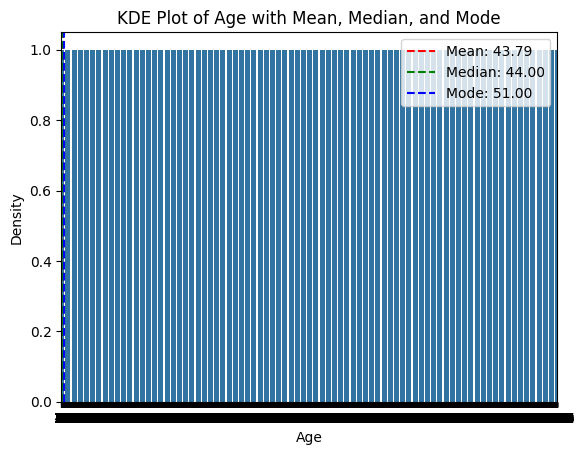

In [215]:
sns.countplot(df["Age"])

# Calculate mean, median, and mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# Annotate mean, median, and mode
plt.axvline(mean_age, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_age))
plt.axvline(median_age, color='g', linestyle='--', label='Median: {:.2f}'.format(median_age))
plt.axvline(mode_age, color='b', linestyle='--', label='Mode: {:.2f}'.format(mode_age))

# Add a legend
plt.legend()

# Show the plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age with Mean, Median, and Mode')
plt.show()

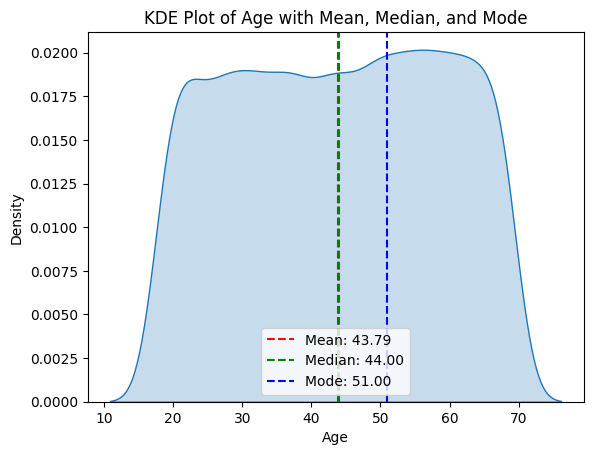

In [216]:


# Create the KDE plot
sns.kdeplot(df['Age'], fill=True)

# Calculate mean, median, and mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# Annotate mean, median, and mode
plt.axvline(mean_age, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_age))
plt.axvline(median_age, color='g', linestyle='--', label='Median: {:.2f}'.format(median_age))
plt.axvline(mode_age, color='b', linestyle='--', label='Mode: {:.2f}'.format(mode_age))

# Add a legend
plt.legend()

# Show the plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age with Mean, Median, and Mode')
plt.show()


In [217]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0] 

print(mean_age)
print(median_age)
print(mode_age)

43.7899
44.0
51


In [218]:
import plotly.figure_factory as ff

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]  


fig = ff.create_distplot([df['Age']], ['Age'], show_hist=False, curve_type='kde')

# Add lines for mean, median, and mode with annotations
fig.add_vline(x=mean_age, line_width=2, line_dash='dash', line_color='red', annotation_text=f"Mean: {mean_age:.2f}", annotation_position="top left")
fig.add_vline(x=median_age, line_width=2, line_dash='dash', line_color='green', annotation_text=f"Median: {median_age:.2f}", annotation_position="top right")
fig.add_vline(x=mode_age, line_width=2, line_dash='dash', line_color='blue', annotation_text=f"Mode: {mode_age:.2f}", annotation_position="bottom left")


# Update layout for better appearance
fig.update_layout(
    title='Age Distribution with Mean, Median, and Mode',
    xaxis_title='Age',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show()


## Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [219]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction  
0                   Low  
1                Medium  
2                Medium  
3                Medium  
4                  High

In [220]:
# Calculate variance and standard deviation
variance = df['Purchase Amount ($)'].var()
standard_deviation = df['Purchase Amount ($)'].std()

# Calculate z-scores
mean_purchase_amount = df['Purchase Amount ($)'].mean()
df['Z-Score'] = (df['Purchase Amount ($)'] - mean_purchase_amount) / standard_deviation

# Display results
print(f"Variance of Purchase Amount: {variance:.2f}")
print(f"Standard Deviation of Purchase Amount: {standard_deviation:.2f}")
print("Z-Scores for Purchase Amount:")
df[['Purchase Amount ($)', 'Z-Score']]


Variance of Purchase Amount: 81932.24
Standard Deviation of Purchase Amount: 286.24
Z-Scores for Purchase Amount:


Purchase Amount ($)   Z-Score
0                  202.54 -1.052804
1                  655.94  0.531192
2                  963.65  1.606207
3                  485.59 -0.063942
4                  143.27 -1.259869
...                   ...       ...
9995                99.23 -1.413727
9996               797.81  1.026829
9997               820.17  1.104946
9998                34.94 -1.638330
9999               233.45 -0.944817

[10000 rows x 2 columns]

In [221]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Calculate statistics
mean_purchase_amount = df['Purchase Amount ($)'].mean()
std_dev_purchase_amount = df['Purchase Amount ($)'].std()

# Calculate z-scores
df['Z-Score'] = (df['Purchase Amount ($)'] - mean_purchase_amount) / std_dev_purchase_amount

# Create a histogram of Purchase Amount with a KDE
fig = go.Figure()

# Histogram for Purchase Amount
fig.add_trace(go.Histogram(
    x=df['Purchase Amount ($)'],
    name='Purchase Amount',
    opacity=0.6,
    histnorm='probability density',  # Normalizes the histogram
    marker_color='lightblue',
))

# Add a KDE line for Purchase Amount
kde_x = np.linspace(df['Purchase Amount ($)'].min(), df['Purchase Amount ($)'].max(), 100)
kde_y = px.data.tips()['total_bill'].values # You can use your KDE calculation here

fig.add_trace(go.Scatter(
    x=kde_x,
    y=kde_y,
    mode='lines',
    name='KDE',
    line=dict(color='blue', width=2)
))

# Add mean and standard deviation lines
fig.add_trace(go.Scatter(
    x=[mean_purchase_amount, mean_purchase_amount],
    y=[0, 0.04],  # Adjust y based on the density
    mode='lines',
    name='Mean',
    line=dict(color='red', dash='dash')
))

fig.add_trace(go.Scatter(
    x=[mean_purchase_amount + std_dev_purchase_amount, mean_purchase_amount + std_dev_purchase_amount],
    y=[0, 0.04],
    mode='lines',
    name='Mean + 1 SD',
    line=dict(color='orange', dash='dash')
))

fig.add_trace(go.Scatter(
    x=[mean_purchase_amount - std_dev_purchase_amount, mean_purchase_amount - std_dev_purchase_amount],
    y=[0, 0.04],
    mode='lines',
    name='Mean - 1 SD',
    line=dict(color='orange', dash='dash')
))

# Create a second y-axis for Z-Scores
fig.add_trace(go.Histogram(
    x=df['Z-Score'],
    name='Z-Scores',
    opacity=0.6,
    histnorm='probability density',
    marker_color='lightgreen',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Distribution of Purchase Amount with Mean, SD, and Z-Scores',
    xaxis_title='Values',
    yaxis_title='Density',
    yaxis2=dict(title='Z-Scores Density', overlaying='y', side='right'),
    barmode='overlay',
)

# Show the plot
fig.show()


### Q3: What are the top three product categories based on the number of purchases?

In [222]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [223]:
top_3=df.groupby("Product Category")["Number of Items Purchased"].sum().sort_values(ascending=False)

In [224]:
top_3

Product Category
Toys           6580
Books          6533
Electronics    6469
Clothing       6359
Home           6214
Groceries      6067
Beauty         6057
Sports         5706
Name: Number of Items Purchased, dtype: int64

In [225]:
# Create a count plot using Plotly
fig = px.bar(
    top_3,
    x=top_3.index,
    y=top_3.values,
    labels={'x': 'Product Category', 'y': 'Count'},
    title='Top 3 Product Categories',
    color=top_3.index,
)

# Show the plot
fig.show()

### Q4: How many customers are classified as return customers?

In [226]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [227]:
df.Gender.value_counts()

Gender
Male      3349
Female    3338
Other     3313
Name: count, dtype: int64

In [228]:
return_customer=df.groupby("Gender")['Return Customer'].value_counts()

In [229]:
import plotly.express as px

# Count occurrences of 'Return Customer'
return_customer_counts = df['Return Customer'].value_counts()

# Create a bar chart
fig = px.bar(
    x=return_customer_counts.index,
    y=return_customer_counts.values,
    labels={'x': 'Return Customer', 'y': 'Count'},
    title='Count of Return Customers vs. Non-Return Customers',
    color=return_customer_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set1,  # Choose a color scheme
)

# Show the plot
fig.show()


In [230]:
import plotly.express as px

# Prepare data for pie chart by Gender and Return Customer status
return_customer_gender_counts = df.groupby(['Gender', 'Return Customer']).size().reset_index(name='Count')

# Create a pie chart
pie_fig = px.pie(
    return_customer_gender_counts,
    values='Count',
    names='Return Customer',
    title='Distribution of Return Customers by Gender',
    color='Return Customer',
    color_discrete_sequence=px.colors.qualitative.Set1,
    facet_col='Gender',  # Create separate pie charts for each gender
)

# Show the pie chart
pie_fig.show()


### Q5: What is the average review score given by customers?

In [231]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [232]:
df["Review Score (1-5)"].mean()

2.9951

In [233]:
import plotly.figure_factory as ff

mean_rs = df["Review Score (1-5)"].mean()

fig = ff.create_distplot([df["Review Score (1-5)"]], ["Review Score (1-5)"], show_hist=False, curve_type='kde')

# Add lines for mean, median, and mode with annotations
fig.add_vline(x=mean_rs, line_width=2, line_dash='dash', line_color='red', annotation_text=f"Mean: {mean_rs}", annotation_position="top left")


# Update layout for better appearance
fig.update_layout(
    title='Age Distribution with Mean, Median, and Mode',
    xaxis_title='Age',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show()


In [234]:
import plotly.figure_factory as ff

# Calculate the average review score
mean_rs = df["Review Score (1-5)"].mean()

# Create a distribution plot for Review Score
fig = ff.create_distplot([df["Review Score (1-5)"]], ["Review Score (1-5)"], show_hist=False, curve_type='kde')

# Add a line for the mean with an annotation
fig.add_vline(x=mean_rs, line_width=2, line_dash='dash', line_color='red', annotation_text=f"Average: {mean_rs}", annotation_position="top left")

# Update layout for better appearance
fig.update_layout(
    title='Average Review Score Distribution',
    xaxis_title='Review Score (1-5)',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show()


### Q6: How does the average delivery time vary between subscription statuses (Free,Premium)?

In [235]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [236]:
df.groupby("Subscription Status")["Delivery Time (days)"].mean()

Subscription Status
Free       6.963924
Premium    7.070347
Trial      7.004272
Name: Delivery Time (days), dtype: float64

In [237]:
import plotly.express as px

# Create a DataFrame for visualization
avg_delivery_time = df.groupby("Subscription Status")["Delivery Time (days)"].mean().reset_index()

# Create a vertical bar chart
bar_fig = px.bar(
    avg_delivery_time,
    x='Delivery Time (days)',
    y='Subscription Status',
    title='Average Delivery Time by Subscription Status',
    labels={'Delivery Time (days)': 'Average Delivery Time (days)', 'Subscription Status': 'Subscription Status'},
    color='Subscription Status',
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use a color sequence
    orientation='h'  # Horizontal bar chart
)

# Show the vertical bar chart
bar_fig.show()


### Q7: How many customers are subscribed to the service?

In [238]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [239]:
subscription_counts=df["Subscription Status"].value_counts().reset_index()

In [240]:
import plotly.express as px

# Prepare the data for visualization
subscription_counts = df["Subscription Status"].value_counts().reset_index()
subscription_counts.columns = ['Subscription Status', 'Count']

# Create a bar chart
bar_fig = px.bar(
    subscription_counts,
    x='Subscription Status',
    y='Count',
    title='Number of Customers by Subscription Status',
    labels={'Count': 'Number of Customers'},
    color='Subscription Status',
    color_discrete_sequence=px.colors.qualitative.Set1,
)

# Show the bar chart
bar_fig.show()


### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,Tablet)

In [241]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [242]:
df["Device Type"].value_counts()

Device Type
Mobile     3374
Desktop    3348
Tablet     3278
Name: count, dtype: int64

In [243]:
device_counts = df["Device Type"].value_counts()
total_counts = device_counts.sum()
device_percentages = (device_counts / total_counts) * 100
device_percentages

Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: count, dtype: float64

In [244]:
# Convert to DataFrame for easier plotting
device_percentage_df = device_percentages.reset_index()
device_percentage_df.columns = ['Device Type', 'Percentage']

# Step 3: Create a bar chart to visualize the percentages
bar_fig = px.bar(
    device_percentage_df,
    x='Device Type',
    y='Percentage',
    title='Percentage of Customers by Device Type',
    color='Device Type',
    color_discrete_sequence=px.colors.qualitative.Set2,
)

# Show the bar chart
bar_fig.show()

In [245]:
# Step 3: Create a pie chart to visualize the percentages
pie_fig = px.pie(
    device_percentage_df,
    values='Percentage',
    names='Device Type',
    title='Percentage of Customers by Device Type',
    color='Device Type',
    color_discrete_sequence=px.colors.qualitative.Set1,
)

# Show the pie chart
pie_fig.show()

### Q9: What is the average purchase amount for customers who availed discounts compared to those who didn’t?

In [246]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [247]:
df.groupby("Discount Availed")["Purchase Amount ($)"].mean()

Discount Availed
False    502.511451
True     505.264178
Name: Purchase Amount ($), dtype: float64

In [248]:
import pandas as pd
import plotly.express as px

# Assuming you already have your DataFrame df
# Calculate the average purchase amount based on discount status
avg_purchase = df.groupby("Discount Availed")["Purchase Amount ($)"].mean().reset_index()

# Create a bar chart
bar_fig = px.bar(
    avg_purchase,
    x='Discount Availed',
    y='Purchase Amount ($)',
    title='Average Purchase Amount Based on Discount Availed',
    labels={'Discount Availed': 'Discount Availed', 'Purchase Amount ($)': 'Average Purchase Amount ($)'},
    color='Discount Availed',
    color_discrete_sequence=px.colors.qualitative.Set1,
)

# Show the bar chart
bar_fig.show()


### Q10: What is the most common payment method used by customers?

In [249]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [250]:
df["Payment Method"].value_counts().sort_values(ascending=False)

Payment Method
Bank Transfer       2067
Credit Card         2028
Cash on Delivery    2007
Debit Card          1983
PayPal              1915
Name: count, dtype: int64

In [251]:
import pandas as pd
import plotly.express as px

# Calculate the value counts of payment methods
payment_counts = df["Payment Method"].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

# Create a bar chart
payment_fig = px.bar(
    payment_counts,
    x='Payment Method',
    y='Count',
    title='Most Common Payment Methods Used by Customers',
    labels={'Payment Method': 'Payment Method', 'Count': 'Number of Customers'},
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis,
)

# Show the bar chart
payment_fig.show()


## **Level 2: Intermediate Insights**

### Q1: What are the average review scores of users of the most common payment method?

In [252]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [253]:
df.groupby("Payment Method")["Review Score (1-5)"].mean()

Payment Method
Bank Transfer       2.988873
Cash on Delivery    3.019930
Credit Card         2.970414
Debit Card          2.996974
PayPal              3.000000
Name: Review Score (1-5), dtype: float64

In [254]:
import pandas as pd
import plotly.express as px

# Calculate the average review score for each payment method
average_review_scores = df.groupby("Payment Method")["Review Score (1-5)"].mean().reset_index()

# Create a bar chart for average review scores
average_review_fig = px.bar(
    average_review_scores,
    x='Payment Method',
    y='Review Score (1-5)',
    title='Average Review Scores by Payment Method',
    labels={'Review Score (1-5)': 'Average Review Score'},
    color='Review Score (1-5)',
    color_continuous_scale=px.colors.sequential.Viridis,
)

# Sort the average review scores based on the order of payment counts
payment_counts = df["Payment Method"].value_counts().index.tolist()  # Get the order of payment methods
average_review_fig.update_xaxes(categoryorder='array', categoryarray=payment_counts)  # Rearrange x-axis

# Add annotation for the most common payment method
most_common_payment_method = payment_counts[0]  # The first in the ordered list
mean_review_score = average_review_scores[average_review_scores['Payment Method'] == most_common_payment_method]['Review Score (1-5)'].values[0]

average_review_fig.add_annotation(
    x=most_common_payment_method,
    y=mean_review_score,
    text=f"Most Common: {mean_review_score:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color='red')
)

# Show the bar chart
average_review_fig.show()


In [255]:
import pandas as pd
import plotly.express as px

# Calculate the average review score for each payment method
average_review_scores = df.groupby("Payment Method")["Review Score (1-5)"].mean().reset_index()

# Create a bar chart for average review scores
average_review_fig = px.bar(
    average_review_scores,
    x='Payment Method',
    y='Review Score (1-5)',
    title='Average Review Scores by Payment Method',
    labels={'Review Score (1-5)': 'Average Review Score'},
    color='Review Score (1-5)',
    color_continuous_scale=px.colors.sequential.Viridis,
)

# Sort the average review scores based on the order of payment counts
payment_counts = df["Payment Method"].value_counts().index.tolist()  # Get the order of payment methods
average_review_fig.update_xaxes(categoryorder='array', categoryarray=payment_counts)  # Rearrange x-axis

# Add annotation for the most common payment method with specific styling
most_common_payment_method = payment_counts[0]  # The first in the ordered list
mean_review_score = average_review_scores[average_review_scores['Payment Method'] == most_common_payment_method]['Review Score (1-5)'].values[0]

average_review_fig.add_annotation(
    x=most_common_payment_method,
    y=mean_review_score,
    text=f"Most Common: {mean_review_score:.2f}",
    arrowhead=2,
    bgcolor="red",
    font=dict(color="white"),
    bordercolor="red",
    borderwidth=2,
    borderpad=2,
    arrowcolor="red",
    ax=-80,
    ay=-10,
)

# Show the bar chart
average_review_fig.show()


### Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?

In [256]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [257]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Location', 'Product Category',
       'Purchase Amount ($)', 'Time Spent on Website (min)', 'Device Type',
       'Payment Method', 'Discount Availed', 'Number of Items Purchased',
       'Return Customer', 'Review Score (1-5)', 'Delivery Time (days)',
       'Subscription Status', 'Customer Satisfaction', 'Z-Score'],
      dtype='object')

In [258]:
# Calculate the correlation coefficient
correlation = df["Time Spent on Website (min)"].corr(df["Purchase Amount ($)"])
print(f"Correlation between time spent on website and purchase amount: {correlation}")


Correlation between time spent on website and purchase amount: 0.010024809958752734


In [259]:
import plotly.express as px

# Create a scatter plot
scatter_fig = px.scatter(
    df,
    x='Time Spent on Website (min)',
    y='Purchase Amount ($)',
    title='Correlation between Time Spent on Website and Purchase Amount',
    labels={'Time Spent (minutes)': 'Time Spent (minutes)', 'Purchase Amount ($)': 'Purchase Amount ($)'},
)

# Show the scatter plot
scatter_fig.show()


In [260]:
import plotly.express as px

# Create a scatter plot
scatter_fig = px.scatter(
    df,
    x='Time Spent on Website (min)',  # Updated x-axis label
    y='Purchase Amount ($)',
    title='Correlation between Time Spent on Website and Purchase Amount',
    labels={'Time Spent on Website (min)': 'Time Spent on Website (min)', 'Purchase Amount ($)': 'Purchase Amount ($)'},
)

# Add trend line
scatter_fig.add_traces(px.scatter(df, x='Time Spent on Website (min)', y='Purchase Amount ($)').data)

# Show the scatter plot
scatter_fig.show()


In [261]:
import plotly.express as px

# Create a scatter plot for correlation between time spent and purchase amount
fig = px.scatter(
    df, 
    x='Time Spent on Website (min)',  # Time spent on the website
    y='Purchase Amount ($)',  # Purchase amount
    title='Correlation between Time Spent on Website and Purchase Amount',
    labels={
        'Time Spent on Website (min)': 'Time Spent on Website (min)', 
        'Purchase Amount ($)': 'Purchase Amount ($)'
    },
    size='Purchase Amount ($)',  # Optional: Size based on purchase amount
    color='Time Spent on Website (min)',  # Optional: Color based on purchase amount
    color_discrete_sequence=px.colors.qualitative.Set3,
    hover_name='Purchase Amount ($)'  # Optional: Show purchase amount on hover
)


# Customize axis labels and limits
fig.update_layout(
    xaxis_title='Time Spent on Website (min)',
    yaxis_title='Purchase Amount ($)',
)

# Show the plot
fig.show()


In [262]:
import plotly.express as px

# Create a scatter plot for correlation between time spent and purchase amount
fig = px.scatter(
    df, 
    x='Time Spent on Website (min)',  # Time spent on the website
    y='Purchase Amount ($)',  # Purchase amount
    title='Correlation between Time Spent on Website and Purchase Amount',
    labels={
        'Time Spent on Website (min)': 'Time Spent on Website (min)', 
        'Purchase Amount ($)': 'Purchase Amount ($)'
    },
    size='Purchase Amount ($)',  # Optional: Size based on purchase amount
    color='Time Spent on Website (min)',  # Color based on time spent
    color_discrete_sequence=px.colors.qualitative.Set1,
    #hover_name='Purchase Amount ($)'  # Optional: Show purchase amount on hover
)

# Customize axis labels and limits
fig.update_layout(
    xaxis_title='Time Spent on Website (min)',
    yaxis_title='Purchase Amount ($)',
    width=1700  # Set canvas width
    #height=600,  # Set canvas height
)

# Show the plot
fig.show()


### Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?

In [263]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [264]:
satisfied_customers=df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)]

In [265]:
num_satisfied_return_customers=len(satisfied_customers)

In [266]:
total_customers=len(df)

In [267]:
# Calculate the percentage of satisfied return customers
percentage_satisfied_return_customers = (num_satisfied_return_customers / total_customers) * 100

# Print the result
print(f"Percentage of satisfied return customers: {percentage_satisfied_return_customers:.2f}%")

Percentage of satisfied return customers: 20.08%


In [268]:
# Calculate satisfied return customers
satisfied_return_customers = df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)]
num_satisfied_return_customers = len(satisfied_return_customers)

# Total return customers
total_return_customers = len(df[df["Return Customer"] == True])

# Total customers
total_customers = len(df)

# Calculate the percentages
percentage_satisfied_return_customers = (num_satisfied_return_customers / total_return_customers) * 100
percentage_satisfied_customers = (num_satisfied_return_customers / total_customers) * 100

# Print the results
print(f"Percentage of satisfied return customers: {percentage_satisfied_return_customers:.2f}%")
print(f"Percentage of satisfied customers among all customers: {percentage_satisfied_customers:.2f}%")


Percentage of satisfied return customers: 40.19%
Percentage of satisfied customers among all customers: 20.08%


In [269]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data for the pie charts
satisfied_return_count = num_satisfied_return_customers
not_satisfied_return_count = total_return_customers - num_satisfied_return_customers
satisfied_total_count = num_satisfied_return_customers
not_satisfied_total_count = total_customers - num_satisfied_return_customers

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=('Return Customers', 'All Customers'))

# Pie chart for return customers
fig.add_trace(go.Pie(
    labels=['Satisfied Return Customers', 'Not Satisfied Return Customers'],
    values=[satisfied_return_count, not_satisfied_return_count],
    hole=.3,
    marker=dict(colors=['green', 'red']),
), row=1, col=1)

# Pie chart for all customers
fig.add_trace(go.Pie(
    labels=['Satisfied & Returning Customers', 'Other Customers'],
    values=[satisfied_total_count, not_satisfied_total_count],
    hole=.3,
    marker=dict(colors=['blue', 'orange']),
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Customer Satisfaction Analysis',
    height=400,  # Adjust height if needed
)

# Show the figure
fig.show()


In [270]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data for the pie charts
satisfied_return_count = num_satisfied_return_customers
not_satisfied_return_count = total_return_customers - num_satisfied_return_customers
satisfied_total_count = num_satisfied_return_customers
not_satisfied_total_count = total_customers - num_satisfied_return_customers

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=('Return Customers', 'Total Customer Satisfaction'))

# Pie chart for return customers
fig.add_trace(go.Pie(
    labels=['Satisfied Return Customers', 'Unsatisfied Return Customers'],
    values=[satisfied_return_count, not_satisfied_return_count],
    hole=.3,
    marker=dict(colors=['green', 'red']),
    textinfo='percent+label'  # Show percentage and label
), row=1, col=1)

# Pie chart for all customers
fig.add_trace(go.Pie(
    labels=['Satisfied Customers', 'Unsatisfied or Non-returning Customers'],
    values=[satisfied_total_count, not_satisfied_total_count],
    hole=.3,
    marker=dict(colors=['blue', 'orange']),
    textinfo='percent+label'  # Show percentage and label
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Customer Satisfaction Analysis',
    height=400,  # Adjust height if needed
)

# Show the figure
fig.show()


In [271]:
# Calculate the number of satisfied return customers
satisfied_customers = df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)]
num_satisfied_return_customers = len(satisfied_customers)

# Total return customers
total_return_customers = len(df[df["Return Customer"] == True])

# Total customers
total_customers = len(df)

# Calculate not satisfied counts
not_satisfied_return_count = total_return_customers - num_satisfied_return_customers
satisfied_total_count = num_satisfied_return_customers
not_satisfied_total_count = total_customers - satisfied_total_count

# Create pie charts
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=('Return Customers', 'Total Customer Satisfaction'))

# Pie chart for return customers
fig.add_trace(go.Pie(
    labels=['Satisfied Return Customers', 'Unsatisfied Return Customers'],
    values=[num_satisfied_return_customers, not_satisfied_return_count],
    hole=.3,
    marker=dict(colors=['green', 'red']),
    textinfo='none'  # Hide text inside pie
), row=1, col=1)

# Pie chart for all customers
fig.add_trace(go.Pie(
    labels=['Satisfied Customers', 'Unsatisfied or Non-returning Customers'],
    values=[satisfied_total_count, not_satisfied_total_count],
    hole=.3,
    marker=dict(colors=['blue', 'orange']),
    textinfo='none'  # Hide text inside pie
), row=1, col=2)

# Add annotations for the first pie chart (Return Customers)
fig.add_annotation(
    x=0.2, y=0.5,
    text=f"Satisfied: {num_satisfied_return_customers} ({(num_satisfied_return_customers / total_return_customers * 100):.1f}%)",
    showarrow=True,
    arrowhead=2,
    ax=-80, ay=0,
    font=dict(size=12, color='black'),
    bordercolor='black',
    borderwidth=1,
)

fig.add_annotation(
    x=0.2, y=0.4,
    text=f"Unsatisfied: {not_satisfied_return_count} ({(not_satisfied_return_count / total_return_customers * 100):.1f}%)",
    showarrow=True,
    arrowhead=2,
    ax=-80, ay=0,
    font=dict(size=12, color='black'),
    bordercolor='black',
    borderwidth=1,
)

# Add annotations for the second pie chart (Total Customers)
fig.add_annotation(
    x=0.8, y=0.5,
    text=f"Satisfied: {satisfied_total_count} ({(satisfied_total_count / total_customers * 100):.1f}%)",
    showarrow=True,
    arrowhead=2,
    ax=80, ay=0,
    font=dict(size=12, color='black'),
    bordercolor='black',
    borderwidth=1,
)

fig.add_annotation(
    x=0.8, y=0.4,
    text=f"Unsatisfied: {not_satisfied_total_count} ({(not_satisfied_total_count / total_customers * 100):.1f}%)",
    showarrow=True,
    arrowhead=2,
    ax=80, ay=0,
    font=dict(size=12, color='black'),
    bordercolor='black',
    borderwidth=1,
)

# Update layout
fig.update_layout(
    title_text='Customer Satisfaction Analysis',
    height=400,  # Adjust height if needed
)

# Show the figure
fig.show()


In [272]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame containing customer data
# Sample DataFrame creation (you should replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment this and load your actual data

# Replace these with your actual calculations
num_satisfied_return_customers = len(df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)])
total_return_customers = len(df[df["Return Customer"] == True])
total_customers = len(df)

# Data for the pie charts
satisfied_return_count = num_satisfied_return_customers
not_satisfied_return_count = total_return_customers - satisfied_return_count
satisfied_total_count = (df["Review Score (1-5)"] >= 4).sum()  # Total satisfied customers
not_satisfied_total_count = total_customers - satisfied_total_count

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],
                    subplot_titles=('Return Customers', 'Total Customer Satisfaction'))

# Pie chart for return customers
fig.add_trace(go.Pie(
    labels=['Satisfied Return Customers', 'Unsatisfied Return Customers'],
    values=[satisfied_return_count, not_satisfied_return_count],
    hole=.3,
    marker=dict(colors=['green', 'red']),
    textinfo='label+percent',  # Show percentage and label
    textposition='outside',  # Position text outside the pie
    
), row=1, col=1)

# Pie chart for all customers
fig.add_trace(go.Pie(
    labels=['Satisfied Customers', 'Unsatisfied or Non-returning Customers'],
    values=[satisfied_total_count, not_satisfied_total_count],
    hole=.3,
    marker=dict(colors=['blue', 'orange']),
    textinfo='label+percent',  # Show percentage and label
    textposition='outside',  # Position text outside the pie
  
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Customer Satisfaction Analysis',
    height=400,  # Adjust height if needed
)

# Show the figure
fig.show()


In [273]:
percentage_not_satisfied_return_customers = 100 - percentage_satisfied_return_customers

# Prepare the data for the pie chart
categories = ['Satisfied Return Customers', 'Not Satisfied Return Customers']
values = [percentage_satisfied_return_customers, percentage_not_satisfied_return_customers]

# Create the pie chart
fig = px.pie(
    names=categories,
    values=values,
    title='Proportion of Satisfied vs Not Satisfied Return Customers',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Show the pie chart
fig.show()


### Q4: What is the relationship between the number of items purchased and customer satisfaction?

In [274]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [275]:
# Calculate the correlation
correlation = df['Number of Items Purchased'].corr(df['Review Score (1-5)'])
print(f"Correlation between number of items purchased and customer satisfaction: {correlation:.2f}")


Correlation between number of items purchased and customer satisfaction: 0.01


In [276]:
import plotly.express as px

# Create a scatter plot for the relationship between items purchased and customer satisfaction
fig = px.scatter(
    df,
    x='Number of Items Purchased',  # Number of items purchased
    y='Customer Satisfaction',  # Customer satisfaction score
    title='Correlation between Number of Items Purchased and Customer Satisfaction',
    labels={
        'Number of Items Purchased': 'Number of Items Purchased',
        'Review Score (1-5)': 'Customer Satisfaction (1-5)'
    },
    size='Review Score (1-5)',  # Optional: Size based on the number of items purchased
    color='Review Score (1-5)',  # Color based on customer satisfaction
    color_discrete_sequence=px.colors.qualitative.Set1,
    
)

# Customize axis labels and limits
fig.update_layout(
    xaxis_title='Number of Items Purchased',
    yaxis_title='Customer Satisfaction (1-5)',
    #width=1700  # Set canvas width
    # height=600,  # Set canvas height if needed
)

# Show the plot
fig.show()


In [277]:
import plotly.express as px

# Create a scatter plot for the relationship between items purchased and customer satisfaction
fig = px.scatter(
    df,
    x='Review Score (1-5)',  # Customer satisfaction score
    y='Number of Items Purchased',  # Number of items purchased
    title='Correlation between Customer Satisfaction and Number of Items Purchased',
    labels={
        'Review Score (1-5)': 'Customer Satisfaction (1-5)',
        'Number of Items Purchased': 'Number of Items Purchased'
    },
    size='Number of Items Purchased',  # Optional: Size based on the number of items purchased
    color='Review Score (1-5)',  # Color based on customer satisfaction
    color_discrete_sequence=px.colors.qualitative.Set1,
    
)

# Customize axis labels and limits
fig.update_layout(
    xaxis_title='Customer Satisfaction (1-5)',
    yaxis_title='Number of Items Purchased',
    xaxis_tickvals=[1, 2, 3, 4, 5],  # Set x-axis ticks to only show whole numbers
  
)

# Show the plot
fig.show()


### Q5: Which location has the 2nd highest average purchase amount?

In [278]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [279]:
#df.groupby("Location")["Purchase Amount ($)"].mean().sort_values(ascending=False)

In [280]:
df.head()

Customer ID  Age Gender  Location Product Category  Purchase Amount ($)  \
0            1   20  Other     Dhaka             Toys               202.54   
1            2   39   Male   Rangpur           Sports               655.94   
2            3   64   Male    Khulna             Home               963.65   
3            4   65  Other  Rajshahi           Beauty               485.59   
4            5   67   Male   Rangpur             Home               143.27   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
1                           27     Desktop     Bank Transfer   
2                            9      Tablet     Bank Transfer   
3                           39     Desktop     Bank Transfer   
4                           17      Tablet        Debit Card   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
1              True                          1            False   
2             False                          8             True   
3              True                          1             True   
4             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
1                   1                     7                Free   
2                   4                     9             Premium   
3                   5                    10               Trial   
4                   4                     1             Premium   

  Customer Satisfaction   Z-Score  
0                   Low -1.052804  
1                Medium  0.531192  
2                Medium  1.606207  
3                Medium -0.063942  
4                  High -1.259869

In [281]:
# Calculate average purchase amount by location
average_purchase = df.groupby("Location")["Purchase Amount ($)"].mean().reset_index()
average_purchase


Location  Purchase Amount ($)
0     Barisal           513.674560
1  Chittagong           507.851675
2       Dhaka           502.002504
3      Khulna           513.937072
4  Mymensingh           507.892211
5    Rajshahi           495.544649
6     Rangpur           494.368867
7      Sylhet           494.976427

In [282]:
# Example DataFrame for Latitude and Longitude
location_coordinates = {
    'Location': ['Khulna', 'Barisal', 'Mymensingh', 'Chittagong', 'Dhaka', 'Rajshahi', 'Sylhet', 'Rangpur'],
    'Latitude': [22.8101, 22.7011, 24.7471, 22.3569, 23.8103, 24.3745, 24.0634, 25.7520],
    'Longitude': [89.5403, 90.3633, 90.4151, 91.7832, 90.4125, 88.6045, 91.8986, 88.6230]
}

# Create a DataFrame
location_df = pd.DataFrame(location_coordinates)
location_df

Location  Latitude  Longitude
0      Khulna   22.8101    89.5403
1     Barisal   22.7011    90.3633
2  Mymensingh   24.7471    90.4151
3  Chittagong   22.3569    91.7832
4       Dhaka   23.8103    90.4125
5    Rajshahi   24.3745    88.6045
6      Sylhet   24.0634    91.8986
7     Rangpur   25.7520    88.6230

In [283]:
# Merge average purchase with location coordinates
merged_df = pd.merge(average_purchase, location_df, on="Location")

merged_df

Location  Purchase Amount ($)  Latitude  Longitude
0     Barisal           513.674560   22.7011    90.3633
1  Chittagong           507.851675   22.3569    91.7832
2       Dhaka           502.002504   23.8103    90.4125
3      Khulna           513.937072   22.8101    89.5403
4  Mymensingh           507.892211   24.7471    90.4151
5    Rajshahi           495.544649   24.3745    88.6045
6     Rangpur           494.368867   25.7520    88.6230
7      Sylhet           494.976427   24.0634    91.8986

In [284]:
import plotly.express as px

# Create a heatmap using the average purchase amount
fig = px.scatter_mapbox(
    merged_df, 
    lat='Latitude', 
    lon='Longitude', 
    size='Purchase Amount ($)',  # Use average purchase amount for bubble size
    color='Purchase Amount ($)',  # Use average purchase amount for color
    hover_name='Location',
    hover_data={'Latitude': False, 'Longitude': False, 'Purchase Amount ($)': True},
    title='Average Purchase Amount Heatmap by Location in Bangladesh',
    zoom=6,  # Zoom level focused on Bangladesh
    center={'lat': 23.685, 'lon': 90.3563},  # Center of Bangladesh
    height=500
)

# Use open-street-map for the background map style
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()


In [285]:
# Get the location with the second highest average purchase amount
second_highest_location = merged_df.nlargest(2, "Purchase Amount ($)").iloc[-1]
second_highest_location


Location                 Barisal
Purchase Amount ($)    513.67456
Latitude                 22.7011
Longitude                90.3633
Name: 0, dtype: object

In [286]:
import plotly.express as px

# Create a heatmap using the average purchase amount
fig = px.scatter_mapbox(
    merged_df, 
    lat='Latitude', 
    lon='Longitude', 
    size='Purchase Amount ($)',  # Use average purchase amount for bubble size
    color='Purchase Amount ($)',  # Use average purchase amount for color
    hover_name='Location',
    hover_data={'Latitude': False, 'Longitude': False, 'Purchase Amount ($)': True},
    title='Average Purchase Amount Heatmap by Location in Bangladesh',
    zoom=6,  # Zoom level focused on Bangladesh
    center={'lat': 23.685, 'lon': 90.3563},  # Center of Bangladesh
    height=500
)

# Use open-street-map for the background map style
fig.update_layout(mapbox_style="open-street-map")

# Get the location with the second highest average purchase amount
second_highest_location = merged_df.nlargest(2, "Purchase Amount ($)").iloc[-1]

# Print the second highest location for debugging
print("Second Highest Location:", second_highest_location)

# Add annotation for the 2nd highest location
fig.add_annotation(
    x=second_highest_location['Longitude'],
    y=second_highest_location['Latitude'],
    text=f"2nd Highest: {second_highest_location['Location']} - ${second_highest_location['Purchase Amount ($)']:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="rgba(255, 255, 255, 0.8)",  # White background with some transparency
    bordercolor="black",
    borderwidth=1,
    borderpad=4,
    font=dict(size=12, color="black")
)

# Show the map
fig.show()


Second Highest Location: Location                 Barisal
Purchase Amount ($)    513.67456
Latitude                 22.7011
Longitude                90.3633
Name: 0, dtype: object


In [287]:
import plotly.express as px

# Corrected coordinates for cities in Bangladesh
location_coordinates = {
    'Dhaka': {'lat': 23.8103, 'lon': 90.4125},
    'Chittagong': {'lat': 22.3569, 'lon': 91.7832},
    'Khulna': {'lat': 22.8456, 'lon': 89.5403},
    'Rajshahi': {'lat': 24.3745, 'lon': 88.6042},  # Adjusted Rajshahi's longitude
    'Sylhet': {'lat': 24.8978, 'lon': 91.8714},  # Correct Sylhet coordinates
    'Barisal': {'lat': 22.7010, 'lon': 90.3535},
    'Rangpur': {'lat': 25.7439, 'lon': 89.2752},
    'Mymensingh': {'lat': 24.7471, 'lon': 90.4203}
}

# Add the latitude and longitude to the DataFrame
df['Latitude'] = df['Location'].map(lambda x: location_coordinates[x]['lat'])
df['Longitude'] = df['Location'].map(lambda x: location_coordinates[x]['lon'])

# Calculate average purchase amount by location
average_purchase = df.groupby("Location")["Purchase Amount ($)"].mean().reset_index()

# Merge average purchase with location coordinates
merged_df = pd.merge(average_purchase, df[['Location', 'Latitude', 'Longitude']].drop_duplicates(), on="Location")

# Get the location with the second highest average purchase amount
second_highest_location = merged_df.nlargest(2, "Purchase Amount ($)").iloc[-1]

# Create a heatmap using the average purchase amount
fig = px.scatter_mapbox(
    merged_df, 
    lat='Latitude', 
    lon='Longitude', 
    size='Purchase Amount ($)',  # Use average purchase amount for bubble size
    color='Purchase Amount ($)',  # Use average purchase amount for color
    hover_name='Location',
    hover_data={'Latitude': False, 'Longitude': False, 'Purchase Amount ($)': True},
    title='Average Purchase Amount Heatmap by Location in Bangladesh',
    zoom=6,  # Zoom level focused on Bangladesh
    center={'lat': 23.685, 'lon': 90.3563},  # Center of Bangladesh
    height=600
)

# Add annotation to highlight the second-highest location
fig.add_annotation(
    x=second_highest_location['Longitude'], 
    y=second_highest_location['Latitude'],
    text=f"2nd Highest: {second_highest_location['Location']}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor='yellow',
    font=dict(color='black', size=12)
)

# Use open-street-map for the background map style
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()


In [288]:
import plotly.graph_objects as go
import plotly.express as px

# Corrected coordinates for cities in Bangladesh
location_coordinates = {
    'Dhaka': {'lat': 23.8103, 'lon': 90.4125},
    'Chittagong': {'lat': 22.3569, 'lon': 91.7832},
    'Khulna': {'lat': 22.8456, 'lon': 89.5403},
    'Rajshahi': {'lat': 24.3745, 'lon': 88.6042},  # Adjusted Rajshahi's longitude
    'Sylhet': {'lat': 24.8978, 'lon': 91.8714},  # Correct Sylhet coordinates
    'Barisal': {'lat': 22.7010, 'lon': 90.3535},
    'Rangpur': {'lat': 25.7439, 'lon': 89.2752},
    'Mymensingh': {'lat': 24.7471, 'lon': 90.4203}
}

# Add the latitude and longitude to the DataFrame
df['Latitude'] = df['Location'].map(lambda x: location_coordinates[x]['lat'])
df['Longitude'] = df['Location'].map(lambda x: location_coordinates[x]['lon'])

# Calculate average purchase amount by location
average_purchase = df.groupby("Location")["Purchase Amount ($)"].mean().reset_index()

# Merge average purchase with location coordinates
merged_df = pd.merge(average_purchase, df[['Location', 'Latitude', 'Longitude']].drop_duplicates(), on="Location")

# Get the location with the second highest average purchase amount
second_highest_location = merged_df.nlargest(2, "Purchase Amount ($)").iloc[-1]

# Create a scatter mapbox using the average purchase amount
fig = px.scatter_mapbox(
    merged_df, 
    lat='Latitude', 
    lon='Longitude', 
    size='Purchase Amount ($)',  # Use average purchase amount for bubble size
    color='Purchase Amount ($)',  # Use average purchase amount for color
    hover_name='Location',
    hover_data={'Latitude': False, 'Longitude': False, 'Purchase Amount ($)': True},
    title='Average Purchase Amount Heatmap by Location in Bangladesh',
    zoom=6,  # Zoom level focused on Bangladesh
    center={'lat': 23.685, 'lon': 90.3563},  # Center of Bangladesh
    height=500
)

# Add a marker and annotation for the second-highest location using graph_objects
fig.add_trace(go.Scattermapbox(
    lat=[second_highest_location['Latitude']],
    lon=[second_highest_location['Longitude']],
    mode='markers+text',
    marker=go.scattermapbox.Marker(size=14, color='red'),
    text=f"2nd Highest: {second_highest_location['Location']}",
    textposition="bottom right"
))

# Add an arrow annotation to make it stand out
fig.add_annotation(
    x=second_highest_location['Longitude'], 
    y=second_highest_location['Latitude'],
    text=f"2nd Highest: {second_highest_location['Location']}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor='yellow',
    font=dict(color='black', size=12)
)

# Use open-street-map for the background map style
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()


In [289]:
import plotly.graph_objects as go
import plotly.express as px

# Corrected coordinates for cities in Bangladesh
location_coordinates = {
    'Dhaka': {'lat': 23.8103, 'lon': 90.4125},
    'Chittagong': {'lat': 22.3569, 'lon': 91.7832},
    'Khulna': {'lat': 22.8456, 'lon': 89.5403},
    'Rajshahi': {'lat': 24.3745, 'lon': 88.6042},  # Adjusted Rajshahi's longitude
    'Sylhet': {'lat': 24.8978, 'lon': 91.8714},  # Correct Sylhet coordinates
    'Barisal': {'lat': 22.7010, 'lon': 90.3535},
    'Rangpur': {'lat': 25.7439, 'lon': 89.2752},
    'Mymensingh': {'lat': 24.7471, 'lon': 90.4203}
}

# Add the latitude and longitude to the DataFrame
df['Latitude'] = df['Location'].map(lambda x: location_coordinates[x]['lat'])
df['Longitude'] = df['Location'].map(lambda x: location_coordinates[x]['lon'])

# Calculate average purchase amount by location
average_purchase = df.groupby("Location")["Purchase Amount ($)"].mean().reset_index()

# Merge average purchase with location coordinates
merged_df = pd.merge(average_purchase, df[['Location', 'Latitude', 'Longitude']].drop_duplicates(), on="Location")

# Get the location with the second highest average purchase amount
second_highest_location = merged_df.nlargest(2, "Purchase Amount ($)").iloc[-1]

# Create a scatter mapbox using the average purchase amount
fig = px.scatter_mapbox(
    merged_df, 
    lat='Latitude', 
    lon='Longitude', 
    size='Purchase Amount ($)',  # Use average purchase amount for bubble size
    color='Purchase Amount ($)',  # Use average purchase amount for color
    hover_name='Location',
    hover_data={'Latitude': False, 'Longitude': False, 'Purchase Amount ($)': True},
    title='Average Purchase Amount by Location in Bangladesh',
    zoom=5.5,  # Zoom level adjusted to show the whole country
    center={'lat': 23.7, 'lon': 90.35},  # Center of Bangladesh
    height=600  # Increase height for better map visibility
)

# Add a marker and annotation for the second-highest location using graph_objects with a prominent style
fig.add_trace(go.Scattermapbox(
    lat=[second_highest_location['Latitude']],
    lon=[second_highest_location['Longitude']],
    mode='markers+text',
    marker=go.scattermapbox.Marker(size=20, color='red', symbol='circle'),  # Large red marker
    text=f"2nd Highest: {second_highest_location['Location']}",
    textposition="bottom right"
))

# Add a larger and more visible styled annotation to highlight the second-highest location
fig.add_annotation(
    x=second_highest_location['Longitude'], 
    y=second_highest_location['Latitude'],
    text=f"2nd Highest: {second_highest_location['Location']}",
    showarrow=True,
    arrowhead=2,
    ax=-100,  # Horizontal offset
    ay=-40,  # Vertical offset
    arrowcolor="red",  # Red arrow for visibility
    bgcolor="red",  # Background color for the text
    font=dict(color="white", size=14),  # White font color with larger text
    bordercolor="red",  # Red border
    borderwidth=3,
    borderpad=4
)

# Use open-street-map for the background map style
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()


## **Level 3: Critical Thinking Insights**

### Q1: What factors contribute most to a customer being classified as a return customer?


In [290]:
df[df["Return Customer"]==True].head(2)

Customer ID  Age Gender Location Product Category  Purchase Amount ($)  \
0            1   20  Other    Dhaka             Toys               202.54   
2            3   64   Male   Khulna             Home               963.65   

   Time Spent on Website (min) Device Type    Payment Method  \
0                           44      Mobile  Cash on Delivery   
2                            9      Tablet     Bank Transfer   

   Discount Availed  Number of Items Purchased  Return Customer  \
0              True                          4             True   
2             False                          8             True   

   Review Score (1-5)  Delivery Time (days) Subscription Status  \
0                   5                     4                Free   
2                   4                     9             Premium   

  Customer Satisfaction   Z-Score  Latitude  Longitude  
0                   Low -1.052804   23.8103    90.4125  
2                Medium  1.606207   22.8456    89.5403

In [291]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Create a new DataFrame for visualization
visualization_df = df.copy()

# Bin the 'Purchase Amount ($)' into categories for better visualization
bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, float('inf')]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-5000', '5000+']
visualization_df['Purchase Amount Category'] = pd.cut(visualization_df['Purchase Amount ($)'], bins=bins, labels=labels, right=False)

# Create a Plotly figure with subplots for each factor (3 insights per row)
fig = make_subplots(rows=5, cols=3, subplot_titles=all_columns, vertical_spacing=0.1)

for i, column in enumerate(all_columns):
    row = i // 3 + 1  # Change to 3 for the number of columns
    col = i % 3 + 1
    if column == 'Purchase Amount ($)':
        column = 'Purchase Amount Category'
    grouped_data = visualization_df.groupby(column)['Return Customer'].mean().reset_index()
    fig.add_trace(
        go.Bar(x=grouped_data[column], y=grouped_data['Return Customer'], name=column),
        row=row, col=col
    )
    fig.update_xaxes(title_text=column, row=row, col=col)
    fig.update_yaxes(title_text='Return Rate', row=row, col=col)

fig.update_layout(height=1800, width=1300, title_text="Return Rate by Various Factors", showlegend=False)

# Save the plot as an HTML file
#fig.write_html("return_rate_all_factors_plotly.html")
print("Interactive plot saved as 'return_rate_all_factors_plotly.html'")

# Display the plot
fig.show()


Interactive plot saved as 'return_rate_all_factors_plotly.html'


In [295]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a new DataFrame for visualization  
visualization_df = df.copy()

# Bin Age
visualization_df['Age Category'] = pd.cut(visualization_df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Bin Time Spent on Website
visualization_df['Time Spent Category'] = pd.cut(visualization_df['Time Spent on Website (min)'], bins=[0, 5, 10, 20, 30, 60, float('inf')], labels=['0-5', '6-10', '11-20', '21-30', '31-60', '60+'])

# Bin the 'Purchase Amount ($)' into categories for better visualization
bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, float('inf')]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-5000', '5000+']
visualization_df['Purchase Amount Category'] = pd.cut(visualization_df['Purchase Amount ($)'], bins=bins, labels=labels, right=False)

# List of columns excluding the new categories
non_categorical_columns = ['Gender', 'Location', 'Product Category', 'Device Type', 
                           'Payment Method', 'Discount Availed', 'Number of Items Purchased', 
                           'Review Score (1-5)', 'Delivery Time (days)', 'Subscription Status', 
                           'Customer Satisfaction']

# Create a Plotly figure with subplots for each factor (3 insights per row)
num_columns = 3
num_rows = (len(non_categorical_columns) + 3) // num_columns + 1  # +1 for additional factors

# Create the subplots
fig = make_subplots(rows=num_rows, cols=num_columns, 
                    subplot_titles=['Age Category', 'Time Spent Category', 'Purchase Amount Category'] + non_categorical_columns,
                    vertical_spacing=0.1)

# Age Category
age_data = visualization_df.groupby('Age Category')['Return Customer'].mean().reset_index()
fig.add_trace(go.Bar(x=age_data['Age Category'], y=age_data['Return Customer'], name='Age'), row=1, col=1)

# Time Spent Category
time_data = visualization_df.groupby('Time Spent Category')['Return Customer'].mean().reset_index()
fig.add_trace(go.Bar(x=time_data['Time Spent Category'], y=time_data['Return Customer'], name='Time Spent'), row=1, col=2)

# Purchase Amount Category
purchase_data = visualization_df.groupby('Purchase Amount Category')['Return Customer'].mean().reset_index()
fig.add_trace(go.Bar(x=purchase_data['Purchase Amount Category'], y=purchase_data['Return Customer'], name='Purchase Amount'), row=1, col=3)

# Other Factors
for i, column in enumerate(non_categorical_columns):
    row = (i // num_columns) + 2  # Start from the second row
    col = (i % num_columns) + 1
    grouped_data = visualization_df.groupby(column)['Return Customer'].mean().reset_index()
    fig.add_trace(
        go.Bar(x=grouped_data[column], y=grouped_data['Return Customer'], name=column),
        row=row, col=col
    )
    fig.update_xaxes(title_text=column, row=row, col=col)
    fig.update_yaxes(title_text='Return Rate', row=row, col=col)

fig.update_layout(height=1800, width=1200, title_text="Return Rate by Various Factors", showlegend=False)

# Display the plot
fig.show()




### Q2: How do payment methods influence customer satisfaction and return rates?

In [296]:
# Convert 'Customer Satisfaction' to numeric values: Low = 1, Medium = 2, High = 3
df['Customer Satisfaction Numeric'] = df['Customer Satisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Re-run the analysis with the converted numeric values
payment_analysis = df.groupby('Payment Method').agg(
    avg_satisfaction=('Customer Satisfaction Numeric', 'mean'),
    return_rate=('Return Customer', 'mean')
).reset_index()

# Plotting the results using Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding bar plot for average customer satisfaction
fig.add_trace(
    go.Bar(x=payment_analysis['Payment Method'], y=payment_analysis['avg_satisfaction'], name='Avg Satisfaction'),
    secondary_y=False,
)

# Adding line plot for return rate
fig.add_trace(
    go.Scatter(x=payment_analysis['Payment Method'], y=payment_analysis['return_rate'], name='Return Rate', mode='lines+markers'),
    secondary_y=True,
)

# Updating layout
fig.update_layout(
    title_text='Influence of Payment Methods on Customer Satisfaction and Return Rates',
    xaxis_title='Payment Method',
    yaxis_title='Average Customer Satisfaction',
    yaxis2_title='Return Rate'
)

# Show the plot
fig.show()

In [297]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Calculate the percentage of each satisfaction level for each payment method
satisfaction_distribution = df.groupby(['Payment Method', 'Customer Satisfaction']).size().unstack(fill_value=0)
satisfaction_distribution = satisfaction_distribution.div(satisfaction_distribution.sum(axis=1), axis=0)

# Calculate return rates
return_rates = df.groupby('Payment Method')['Return Customer'].mean()

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add stacked bar chart for satisfaction levels
for satisfaction_level in ['Low', 'Medium', 'High']:
    fig.add_trace(
        go.Bar(x=satisfaction_distribution.index, 
               y=satisfaction_distribution[satisfaction_level], 
               name=f'Satisfaction: {satisfaction_level}',
               text=[f'{val:.1%}' for val in satisfaction_distribution[satisfaction_level]],
               textposition='inside'),
        secondary_y=False
    )

# Add line chart for return rates
fig.add_trace(
    go.Scatter(x=return_rates.index, y=return_rates.values, 
               name='Return Rate', mode='lines+markers',
               line=dict(color='red', width=2),
               marker=dict(size=8),
               text=[f'{val:.2%}' for val in return_rates.values],
               textposition='top center'),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Customer Satisfaction Distribution and Return Rates by Payment Method',
    barmode='stack',
    xaxis_title='Payment Method',
    yaxis_title='Proportion of Customers',
    yaxis2_title='Return Rate',
    legend_title='Metrics'
)

fig.update_yaxes(tickformat='.0%', secondary_y=False)
fig.update_yaxes(tickformat='.0%', secondary_y=True)

fig.show()

# Print the data for reference
print(satisfaction_distribution)
print("\
Return Rates:")
print(return_rates)

Customer Satisfaction      High       Low    Medium
Payment Method                                     
Bank Transfer          0.339623  0.328012  0.332366
Cash on Delivery       0.312407  0.350274  0.337319
Credit Card            0.346647  0.343688  0.309665
Debit Card             0.336863  0.334846  0.328290
PayPal                 0.315405  0.325326  0.359269
Return Rates:
Payment Method
Bank Transfer       0.506047
Cash on Delivery    0.489287
Credit Card         0.512327
Debit Card          0.491175
PayPal              0.498695
Name: Return Customer, dtype: float64


##